In [59]:
import pandas as pd
import plotly.express as px
import os
from  datetime import datetime
from dateutil.relativedelta import relativedelta
import calendar

import plotly.io as pio

import my_fin_common_libs.data_loader as load_data
#pip install -U kaleido
#https://www.geeksforgeeks.org/python-plotly-exporting-to-static-images/

#https://www.investopedia.com/terms/r/rateofchange.asp#:~:text=Rate%20of%20change%20problems%20can,it%20takes%20to%20do%20so.

In [60]:
is_py=False

In [61]:
# 31Dec21 - 22May22  (last day of prev month - current date)
# Export data from amibroker as format  D:\AB_DB\AB-Template & Explore\TopN_ROC_XPeriod.apx  
# Ticker,Date/Time,open,high,low,close,name,volume
# AVAX,31/12/2021 00:00:00,101.75,111.99,100.13,109.43,,2472910.50
# AVAX,1/1/2022 00:00:00,109.43,114.50,108.42,114.13,,1211128.00

#Amibroker script 

# Filter=1; 


# AddColumn(O,"open"); 
# AddColumn(H,"high"); 
# AddColumn(L,"low"); 
# AddColumn(C,"close"); 



In [62]:
# root_path=r'D:\JupyterCode\MyQuantFinProject\Data\ThaiFund\TH_All'
root_path=r'D:\PythonDev\MyQuantFinProject\Data'
result_path='D:\PythonDev\MyQuantFinProject\Data\Report'

mode='offline'
print(mode)

offline


In [63]:
if mode=='offline':
    file_name='WORLS-US-ASIA-THAI_2H22.csv'
    title=file_name.replace('.csv','')
    data_file=os.path.join(root_path,file_name)
    print(data_file,' -',file_name," : ",title)

else:
    list_symbol=['AAXJ','3010.HK','EEM']
    title='3AsianETF'
    print(list_symbol," : ",title)


D:\PythonDev\MyQuantFinProject\Data\WORLS-US-ASIA-THAI_2H22.csv  - WORLS-US-ASIA-THAI_2H22.csv  :  WORLS-US-ASIA-THAI_2H22


In [78]:
from_month_str='2022-06-30'  
# select the last trading day of Timeframe of prev
# tf week  look back since 2022-08-25  to find pct at 2022-09-01
# tf month  look back since 2022-08-31  to find pct at 2022-09-30 
to_month_str='2022-12-10'

#timeframe='W-FRI'
timeframe='M'

col_pct='price'
col_date='date'

limit_time=15
limit_symbol=10

# Export Data sicne last day of preve month (Most Impotant)

# limt 12 bars : 12 year ,2q 12 week

In [66]:
if mode=='offline':
    df,list_symbol=load_data.load_offline_data(from_month_str,to_month_str,data_file)
else:
    df=load_data.load_online_data(from_month_str,to_month_str,list_symbol)

print("==========================================================================")
print(f"Input: {from_month_str} - {to_month_str} on {timeframe}")
print(f"Data: {df.index.min().strftime('%Y-%m-%d')} - {df.index.max().strftime('%Y-%m-%d')} on {timeframe}")
print(df.info())

print(df.head())
print(df.tail())


if len(list_symbol)>limit_symbol:
    raise Exception(f'Symbol to process is over {limit_symbol}')


if  df.empty:
    print("No data according to your timeframe.")
    exit()

Load Price Data
           symbol  price
date                    
2022-06-30   AAXJ  69.20
2022-07-01   AAXJ  68.69
2022-07-05   AAXJ  68.37
             symbol  price
date                      
2022-12-07  TDEX.BK   9.73
2022-12-08  TDEX.BK   9.70
2022-12-09  TDEX.BK   9.72
Input: 2022-06-30 - 2022-12-10 on M
Data: 2022-06-30 - 2022-12-09 on M
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 451 entries, 2022-06-30 to 2022-12-09
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   symbol  451 non-null    object 
 1   price   451 non-null    float64
dtypes: float64(1), object(1)
memory usage: 10.6+ KB
None
           symbol  price
date                    
2022-06-30   AAXJ  69.20
2022-07-01   AAXJ  68.69
2022-07-05   AAXJ  68.37
2022-07-06   AAXJ  67.86
2022-07-07   AAXJ  69.28
             symbol  price
date                      
2022-12-02  TDEX.BK   9.78
2022-12-06  TDEX.BK   9.75
2022-12-07  TDEX.BK   9.73
2022-12-08  TD

# Create TimeSeries To Find ROC base on N Period

In [67]:
list_range=pd.date_range(start=from_month_str,end= to_month_str, freq= timeframe)
print(list_range)
if len(list_range)-1>limit_time:
    raise Exception(f'Range to process is over {limit_time}')

DatetimeIndex(['2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30',
               '2022-10-31', '2022-11-30'],
              dtype='datetime64[ns]', freq='M')


In [68]:
buildtime = datetime.now().strftime('%d%m%y_%H%M')
print(f"PCT  {from_month_str} - {to_month_str} at {buildtime}")

PCT  2022-06-30 - 2022-12-10 at 161222_1559


# Agg Pct of Price period of each Symbol With Close Price of Last trading day of the month/week To Prev

In [69]:


Allcols_Pct=['symbol',col_date,'pct_change']
df_Pct_Price=pd.DataFrame(columns=Allcols_Pct)
print(df_Pct_Price)

print(f"Agg Pct on {timeframe} period of each Symbol ")


print(list_symbol)

for symbol in list_symbol:

    dfx_symbol=df.query('symbol==@symbol')

    dfx_px = dfx_symbol.resample(timeframe).last()
    dfx_px=dfx_px.reset_index()


    dfx_px['pct_change']=dfx_px[col_pct].pct_change()*100
    dfx_px['pct_change']=dfx_px['pct_change'].round(2)

    dfx_px=dfx_px[[col_date,'symbol',col_pct,'pct_change']]


    dfx_px=dfx_px.dropna()
    dfx_px=dfx_px.drop(columns=[col_pct])
    dfx_px=dfx_px[Allcols_Pct]
    print(dfx_px)

    df_Pct_Price=pd.concat([df_Pct_Price, dfx_px], ignore_index=True)
print("==================================================") 
print("All Asset PCT Aggration")
print(df_Pct_Price)


Empty DataFrame
Columns: [symbol, date, pct_change]
Index: []
Agg Pct on M period of each Symbol 
['AAXJ', 'ACWI', 'SPY', 'TDEX.BK']
  symbol       date  pct_change
1   AAXJ 2022-07-31       -1.73
2   AAXJ 2022-08-31       -1.53
3   AAXJ 2022-09-30      -12.59
4   AAXJ 2022-10-31       -5.16
5   AAXJ 2022-11-30       20.16
6   AAXJ 2022-12-31       -0.09
  symbol       date  pct_change
1   ACWI 2022-07-31        7.07
2   ACWI 2022-08-31       -4.36
3   ACWI 2022-09-30       -9.39
4   ACWI 2022-10-31        6.35
5   ACWI 2022-11-30        8.34
6   ACWI 2022-12-31       -2.60
  symbol       date  pct_change
1    SPY 2022-07-31        9.21
2    SPY 2022-08-31       -4.08
3    SPY 2022-09-30       -9.62
4    SPY 2022-10-31        8.13
5    SPY 2022-11-30        5.56
6    SPY 2022-12-31       -3.53
    symbol       date  pct_change
1  TDEX.BK 2022-07-31        0.32
2  TDEX.BK 2022-08-31        4.26
3  TDEX.BK 2022-09-30       -3.06
4  TDEX.BK 2022-10-31        1.68
5  TDEX.BK 2022-11-30    

# create directory report

In [70]:
print("create directory")
folder_report=f'pct_{title}_{timeframe }_{buildtime}'
report_path=result_path+"\\"+folder_report

try:  
 if not os.path.exists(report_path):
     os.mkdir(report_path) 
     print(report_path)   
     
except OSError as error:  
    raise error

create directory
D:\PythonDev\MyQuantFinProject\Data\Report\pct_WORLS-US-ASIA-THAI_2H22_M_161222_1559


# Final data to plot chart

In [71]:
df_Pct_Price =df_Pct_Price.sort_values(by=[col_date],ascending = [False])
df_Pct_Price =df_Pct_Price .reset_index(drop=True)
df_Pct_Price

,symbol,date,pct_change
0,TDEX.BK,2022-12-31,-1.12
1,SPY,2022-12-31,-3.53
2,ACWI,2022-12-31,-2.60
3,AAXJ,2022-12-31,-0.09
4,TDEX.BK,2022-11-30,1.76
5,SPY,2022-11-30,5.56
6,ACWI,2022-11-30,8.34
7,AAXJ,2022-11-30,20.16
8,ACWI,2022-10-31,6.35
9,SPY,2022-10-31,8.13


Percent change  of asset on M periond since 2022-06-30 - 2022-12-10


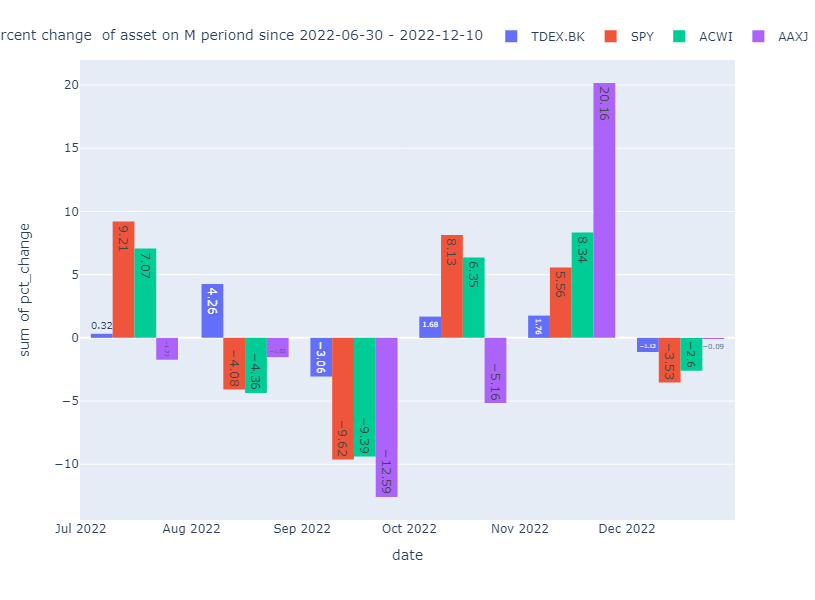

In [72]:
chart_title=f'Percent change  of asset on {timeframe} periond since {from_month_str} - {to_month_str}'
print(chart_title)
fig = px.histogram(df_Pct_Price, x=col_date, y="pct_change",text_auto=True,
             color='symbol', barmode='group',height=600)

fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1,
    title=chart_title 
))

# fig.update_layout(
#     autosize=True,
#     width=2000,
#     height=1000,)

fig.show()

pio.write_image(fig, f"{report_path}\\{title}-{chart_title}.png")


In [73]:
chart_title=f"Sum of Return since {from_month_str} to {to_month_str}"


dfSum_Pct_Price=  df_Pct_Price.groupby(["symbol"])[["pct_change"]].sum()
dfSum_Pct_Price.reset_index(drop=False,inplace=True)
dfSum_Pct_Pric=dfSum_Pct_Price.sort_values(by="pct_change",ascending=False)
print(chart_title)
print(dfSum_Pct_Price)


Sum of Return since 2022-06-30 to 2022-12-10
    symbol  pct_change
0     AAXJ       -0.94
1     ACWI        5.41
2      SPY        5.67
3  TDEX.BK        3.84


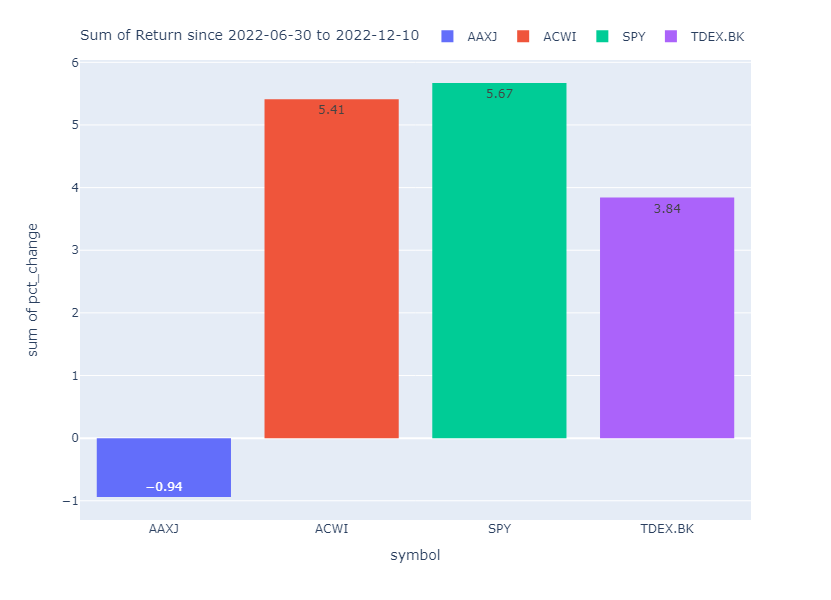

In [74]:

fig = px.histogram(dfSum_Pct_Price, x="symbol", y="pct_change",text_auto=True,
             color='symbol',height=600)

fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1,
    title=chart_title 
))

fig.show()

pio.write_image(fig, f"{report_path}\\{title}-{chart_title}.png")

In [75]:
print(f"Count gain or loss at {timeframe} period")
df_Pct_Price['is-gain']=df_Pct_Price.apply(lambda x: 'True' if x['pct_change']>0 else 'False' ,axis=1)
df_Pct_Price

Count gain or loss at M period


,symbol,date,pct_change,is-gain
0,TDEX.BK,2022-12-31,-1.12,False
1,SPY,2022-12-31,-3.53,False
2,ACWI,2022-12-31,-2.60,False
3,AAXJ,2022-12-31,-0.09,False
4,TDEX.BK,2022-11-30,1.76,True
5,SPY,2022-11-30,5.56,True
6,ACWI,2022-11-30,8.34,True
7,AAXJ,2022-11-30,20.16,True
8,ACWI,2022-10-31,6.35,True
9,SPY,2022-10-31,8.13,True


In [76]:
df_PCt_Count=df_Pct_Price.groupby([col_date,'is-gain'],as_index=False).size()
df_PCt_Count.rename(columns={'size':'count'},inplace=True)
df_PCt_Count=df_PCt_Count.reset_index(drop=True)
df_PCt_Count

,date,is-gain,count
0,2022-07-31,False,1
1,2022-07-31,True,3
2,2022-08-31,False,3
3,2022-08-31,True,1
4,2022-09-30,False,4
5,2022-10-31,False,1
6,2022-10-31,True,3
7,2022-11-30,True,4
8,2022-12-31,False,4


In [77]:
writer=pd.ExcelWriter(f'{report_path}\\Summary.xlsx',engine='xlsxwriter') 

df_Pct_Price.to_excel(writer, sheet_name="PctSymbol_Date",index=False)
df_PCt_Count.to_excel(writer, sheet_name="IsGain_Date",index=False)
writer.save()

print("Successfully")

Successfully


C:\Users\pongthsa\AppData\Local\Temp\ipykernel_19612\935811667.py:5: FutureWarning:

save is not part of the public API, usage can give in unexpected results and will be removed in a future version

